# LLM for image and video segmentation


In [ ]:
# pip install peft

frame_03379.png


propagate in video: 100%|██████████| 1/1 [00:00<00:00, 5667.98it/s]


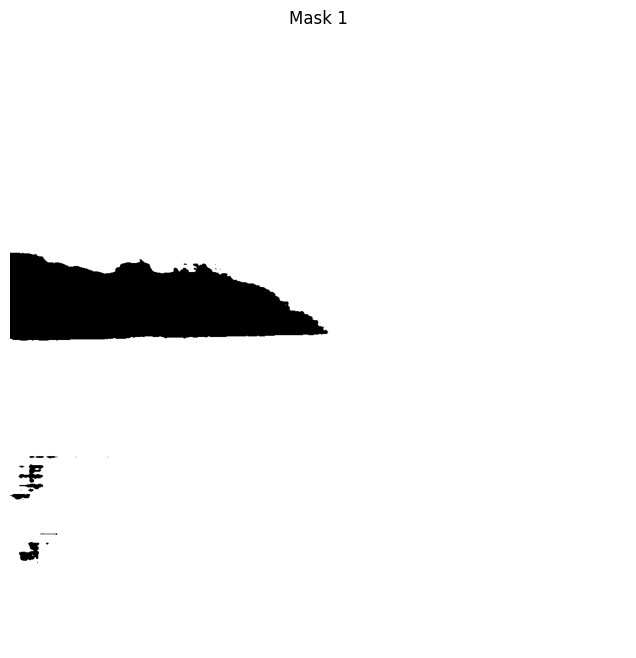

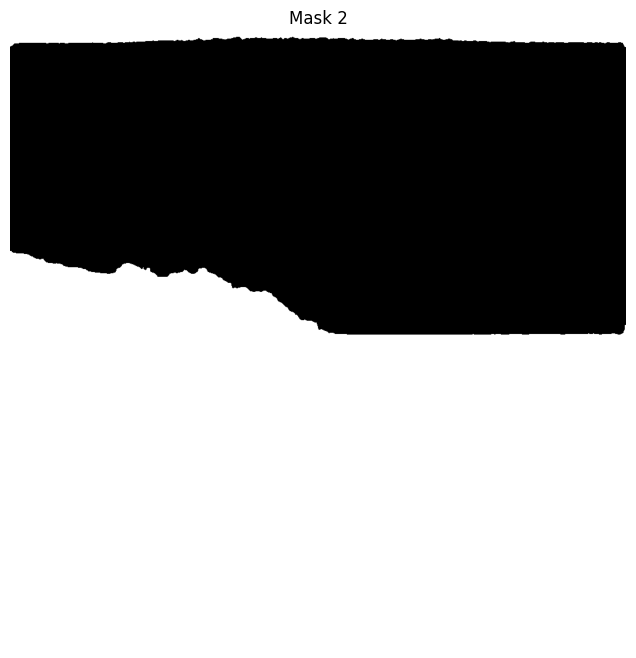

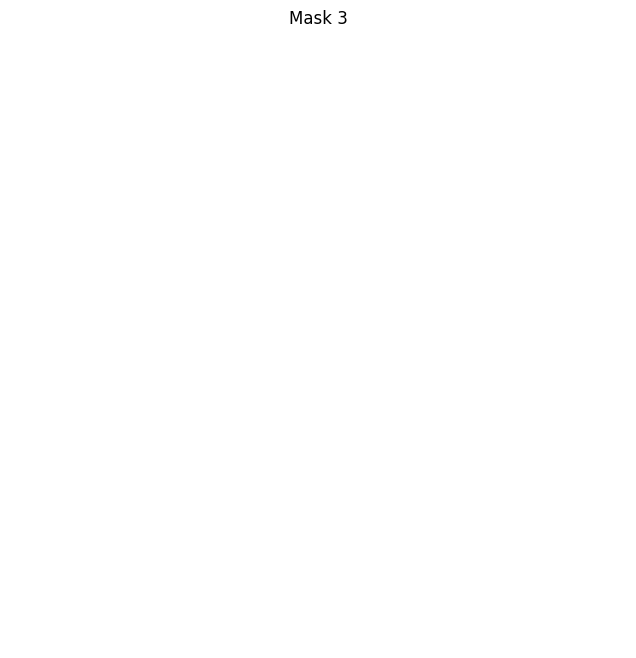

frame_02787.png


propagate in video: 100%|██████████| 1/1 [00:00<00:00, 6393.76it/s]


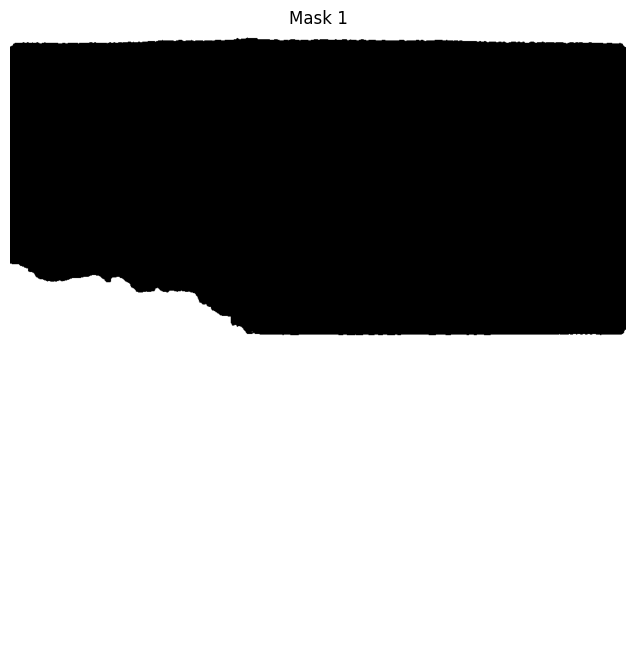

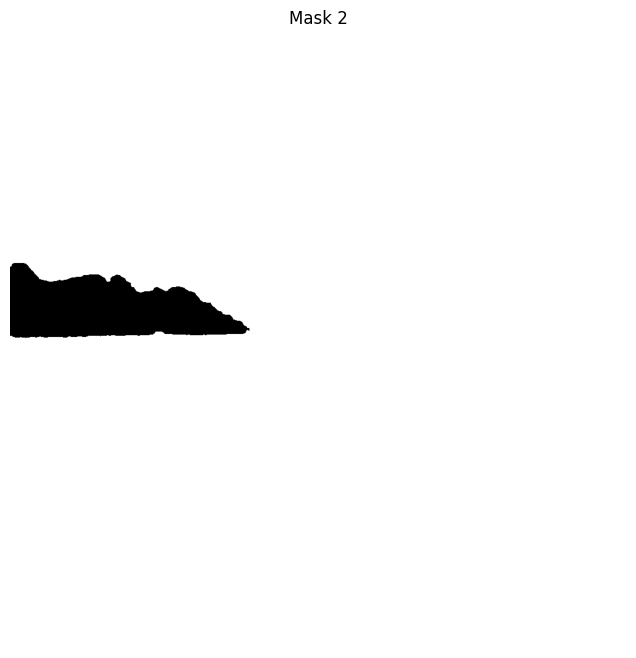

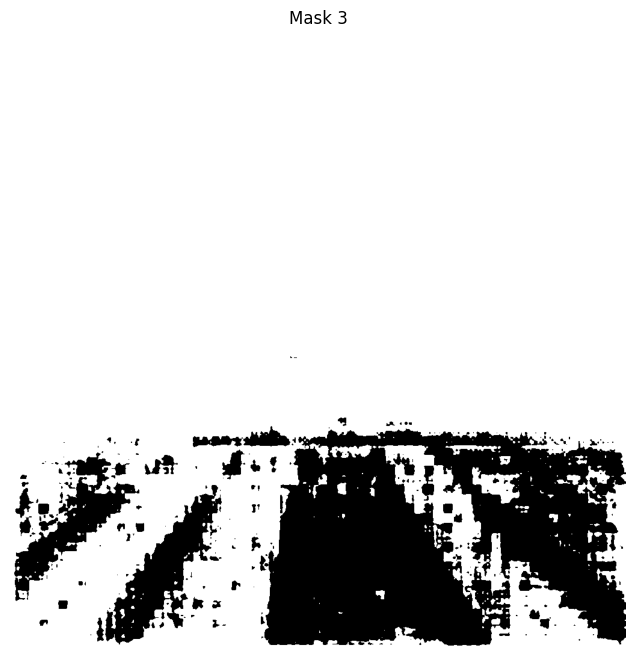

frame_09016.png


propagate in video: 100%|██████████| 1/1 [00:00<00:00, 11397.57it/s]


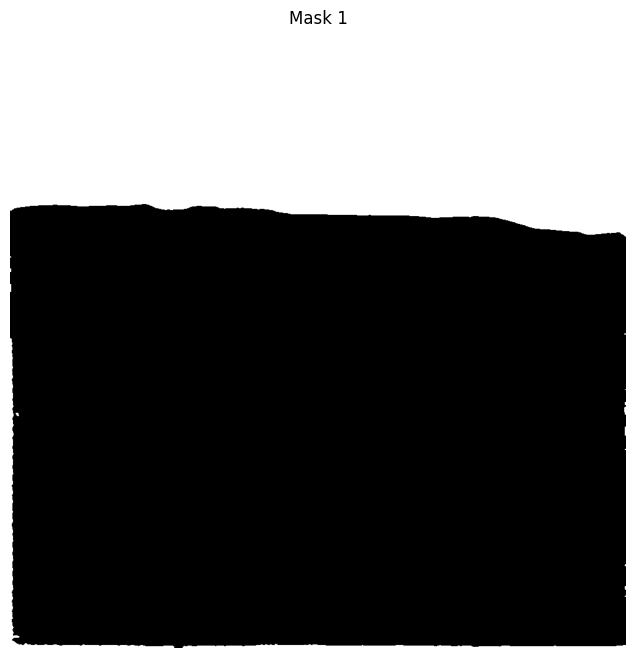

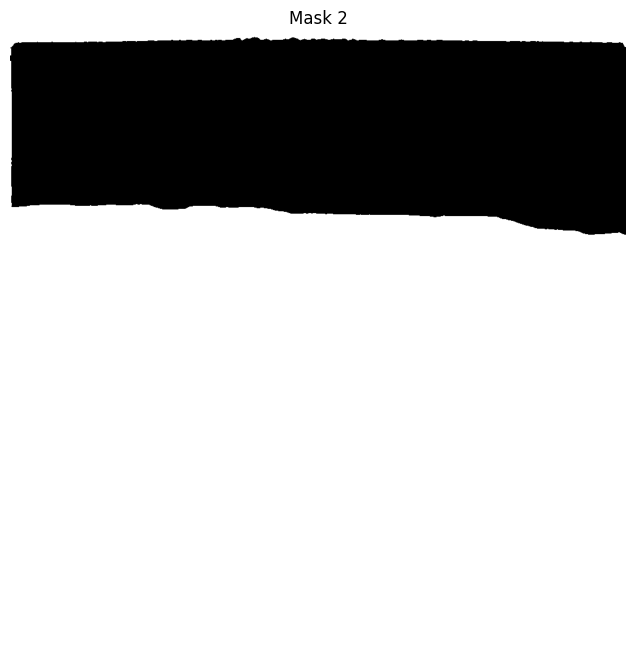

frame_04054.png


propagate in video: 100%|██████████| 1/1 [00:00<00:00, 11184.81it/s]


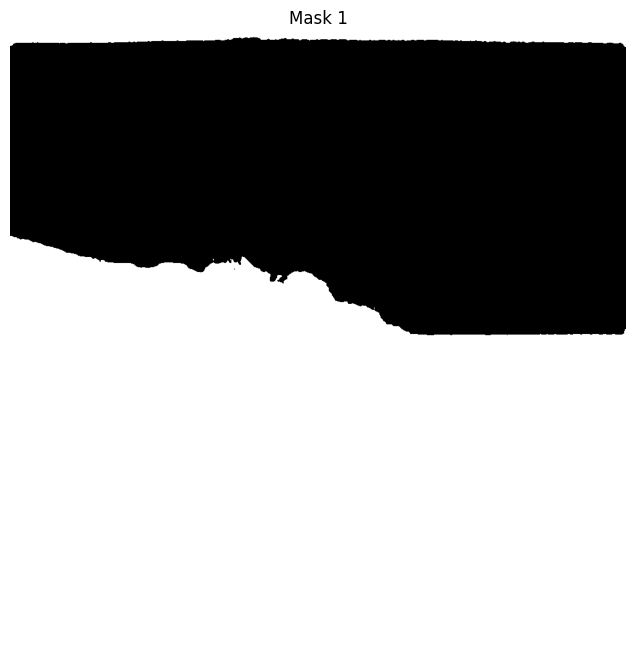

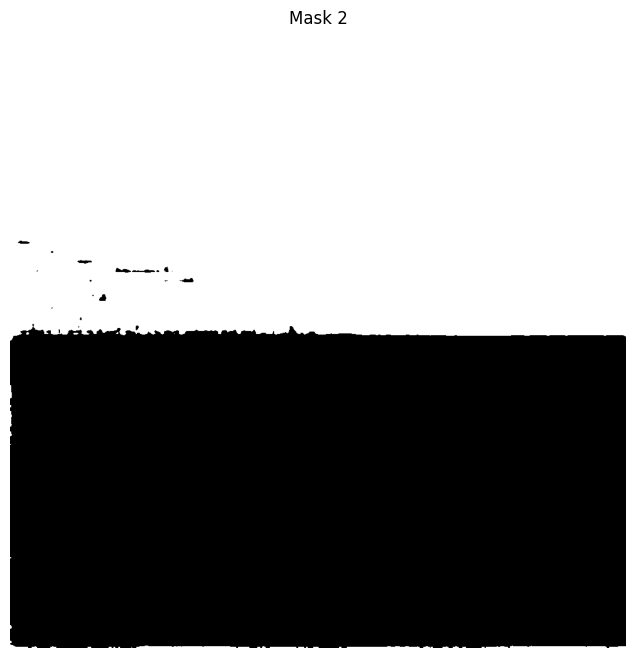

frame_03850.png


propagate in video: 100%|██████████| 1/1 [00:00<00:00, 8793.09it/s]


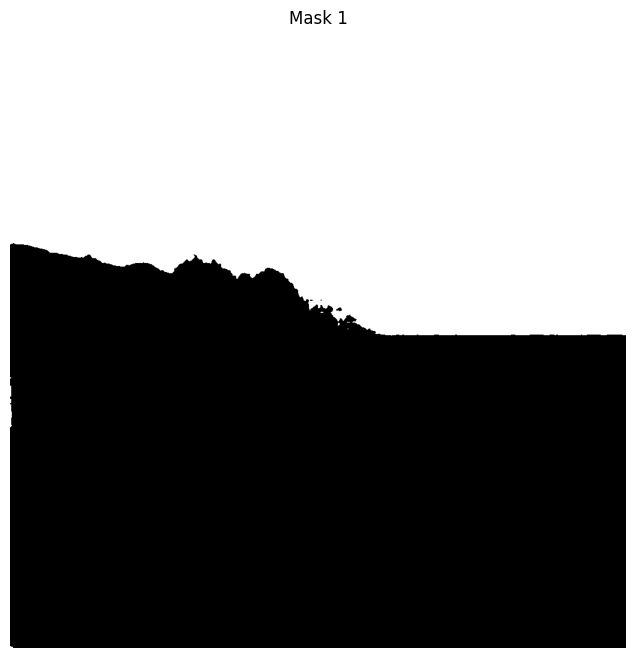

frame_11488.png


propagate in video: 100%|██████████| 1/1 [00:00<00:00, 4681.14it/s]


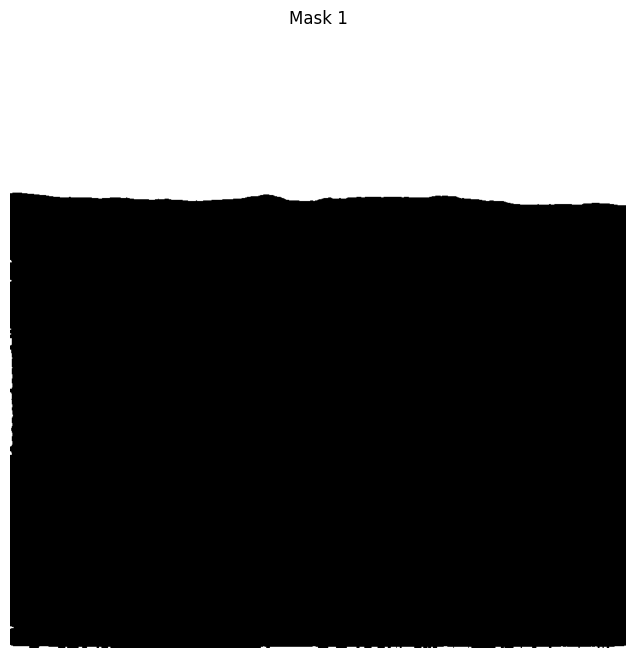

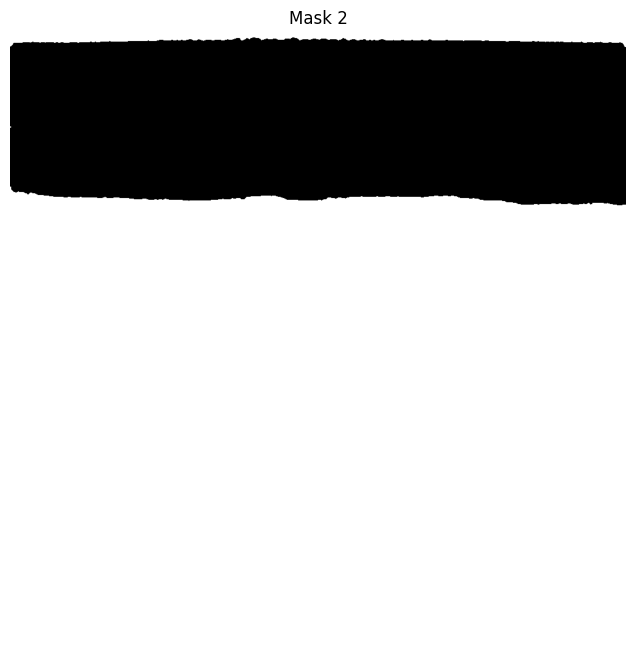

In [24]:
import torch
from transformers import AutoTokenizer, AutoModel
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

# load the model and tokenizer
path = "ByteDance/Sa2VA-4B"
model = AutoModel.from_pretrained(
    path,
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    use_flash_attn=True,
    trust_remote_code=True).eval().cuda()
tokenizer = AutoTokenizer.from_pretrained(path, trust_remote_code=True, use_fast=False)

# for image chat with segmentation output
for image_path in os.listdir("/workspace/imgs"):
    if image_path.endswith(".jpg") or image_path.endswith(".png"):
        print(image_path)
        image_path = "/workspace/imgs/" + image_path
        text_prompts = "<image>Could you please give me a brief description of the image? Please respond with interleaved segmentation masks for the corresponding parts of the answer."
        image = Image.open(image_path).convert('RGB')
        input_dict = {
            'image': image,
            'text': text_prompts,
            'past_text': '',
            'mask_prompts': None,
            'tokenizer': tokenizer,
            }
        return_dict = model.predict_forward(**input_dict)
        answer = return_dict["prediction"] # the text format answer
        masks = return_dict['prediction_masks']  # segmentation masks, list(np.array(1, h, w), ...)
        
        # Plot each mask in the list of masks
        for i, mask in enumerate(masks):
            mask = mask[0]
            plt.figure(figsize=(8, 8))
            plt.imshow(mask, cmap='binary')
            plt.title(f'Mask {i+1}')
            plt.axis('off')
            plt.show()

# # for video chat with segmentation mask output
# video_folder = "/workspace/"
# images_paths = os.listdir(video_folder)
# images_paths = [os.path.join(video_folder, image_path) for image_name in images_paths ]
# text_prompts = "<image>Please segment the person."
# input_dict = {
#     'video': images_paths,
#     'text': text_prompts,
#     'past_text': '',
#     'mask_prompts': None,
#     'tokenizer': tokenizer,
# }
# return_dict = model.predict_forward(**input_dict)
# answer = return_dict["prediction"] # the text format answer
# masks = return_dict['prediction_masks']  # segmentation masks, list(np.array(n_frames, h, w), ...)